## Import Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\Alzheimer’s Prediction\alzheimers_prediction_dataset.csv')
data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [4]:
data.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [5]:
data.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [6]:
data.rename(columns={'Alzheimer’s Diagnosis':'Alzheimer','Education Level':'Education_Level',
                     'Physical Activity Level':'Physical_Activity_Level','Smoking Status':'Smoking_Status',
                     'Alcohol Consumption':'Alcohol_Consumption','Cholesterol Level':'Cholesterol_Level',
                     'Family History of Alzheimer’s':'Family_History','Cognitive Test Score':'Cognitive_Test _Score',
                     'Depression Level':'Depression_Level','Sleep Quality':'Sleep_Quality','Dietary Habits':'Dietary_Habits',
                     'Air Pollution Exposure':'Air_Pollution_Exposure','Employment Status':'Employment_Status',
                     'Marital Status':'Marital_Status','Income Level':'Income_Level','Urban vs Rural Living':'Urban_vs_Rural_Living',
                     'Stress Levels':'Stress_Levels','Marital Status':'Marital_Status','Social Engagement Level':'Social_Engagement_Level',
                     'Genetic Risk Factor (APOE-ε4 allele)':'Genetic_Risk_Factor','Employment Status':'Employment_Status',
                     'Air Pollution Exposure':'Air_Pollution_Exposure','Dietary Habits':'Dietary_Habits','Sleep Quality':'Sleep_Quality','Depression Level':'Depression_Level','Cognitive Test Score':'Cognitive_Test'},inplace=True)
data.head()

,Country,Age,Gender,Education_Level,BMI,Physical_Activity_Level,Smoking_Status,Alcohol_Consumption,Diabetes,Hypertension,...,Dietary_Habits,Air_Pollution_Exposure,Employment_Status,Marital_Status,Genetic_Risk_Factor,Social_Engagement_Level,Income_Level,Stress_Levels,Urban_vs_Rural_Living,Alzheimer
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [7]:
data.columns

Index(['Country', 'Age', 'Gender', 'Education_Level', 'BMI',
       'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol_Level', 'Family_History',
       'Cognitive_Test', 'Depression_Level', 'Sleep_Quality', 'Dietary_Habits',
       'Air_Pollution_Exposure', 'Employment_Status', 'Marital_Status',
       'Genetic_Risk_Factor', 'Social_Engagement_Level', 'Income_Level',
       'Stress_Levels', 'Urban_vs_Rural_Living', 'Alzheimer'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
data.Country.value_counts()

Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64

In [10]:
data.Country.nunique()/data.shape[0]*100

0.02692406068683279

<Axes: xlabel='Country'>

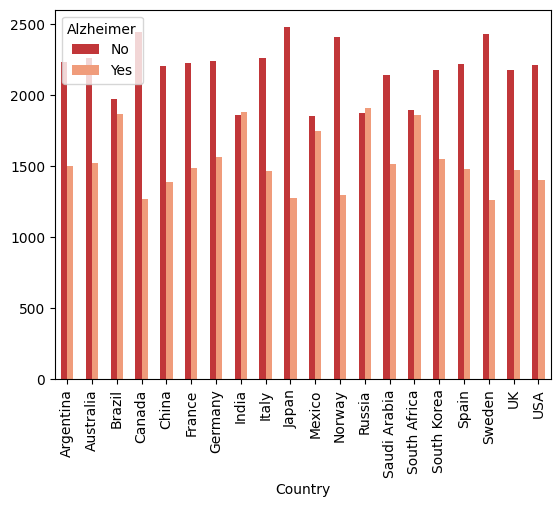

In [11]:
color = sns.color_palette('RdBu')
pd.crosstab(data.Country,data.Alzheimer).plot(kind='bar',color=color)

In [12]:
data.drop(columns='Country',axis=1,inplace=True)

In [13]:
data.Age.nunique()/data.shape[0]*100                                            

0.06057913654537377

In [14]:
data.Age.min()

50

In [15]:
data.Age.max()

94

In [16]:
data.Age.mean() - data.Age.std() *3

33.022458677898406

In [17]:
data.Age.mean() + data.Age.std() *3

110.90694643498071

<Axes: ylabel='Age'>

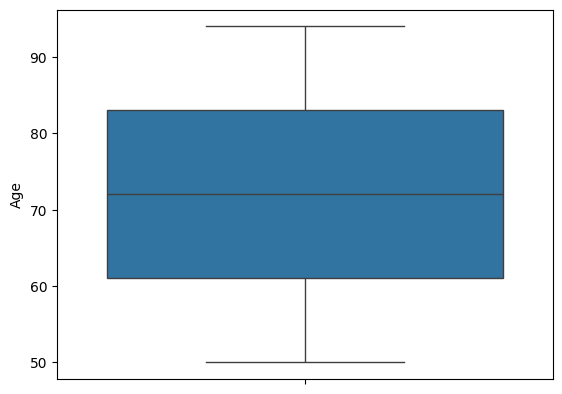

In [18]:
sns.boxplot(data.Age)

In [19]:
data.groupby('Alzheimer')['Age'].mean()

Alzheimer
No     67.388203
Yes    78.457005
Name: Age, dtype: float64

<Axes: xlabel='Alzheimer'>

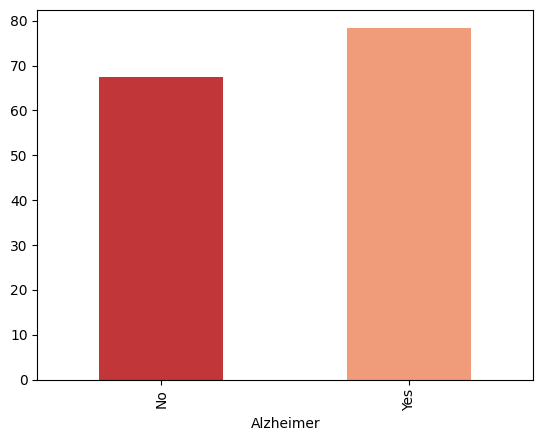

In [20]:
data.groupby('Alzheimer')['Age'].mean().plot(kind='bar',color=color)

Text(0.5, 1.0, 'Distribution of Age has Alzheimer’s Diagnosis')

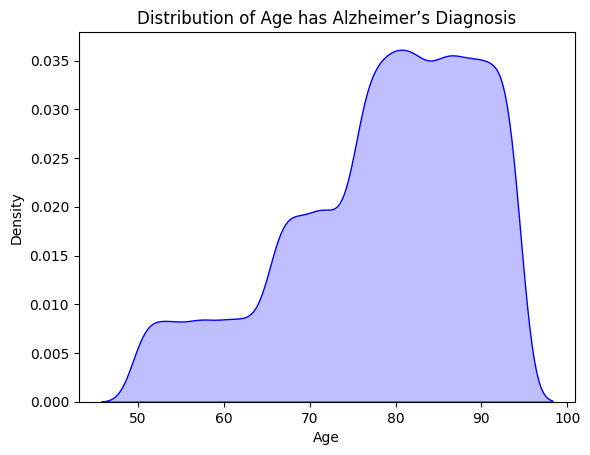

In [21]:
sns.kdeplot(data[data['Alzheimer']=='Yes']['Age'], color='blue', fill=True)
plt.title('Distribution of Age has Alzheimer’s Diagnosis')

In [22]:
data.Education_Level.value_counts()

Education_Level
14    3810
1     3782
6     3780
15    3774
7     3747
4     3741
8     3718
9     3715
3     3715
17    3711
2     3709
16    3704
11    3701
12    3686
10    3685
5     3685
18    3677
13    3664
0     3646
19    3633
Name: count, dtype: int64

In [23]:
data.Education_Level.min()

0

In [24]:
data.Education_Level.max()

19

In [25]:
data.Education_Level.mean() - data.Education_Level.std() * 3

-7.783546375827465

In [26]:
data.Education_Level.mean() + data.Education_Level.std() * 3

26.75857430954043

<Axes: ylabel='Education_Level'>

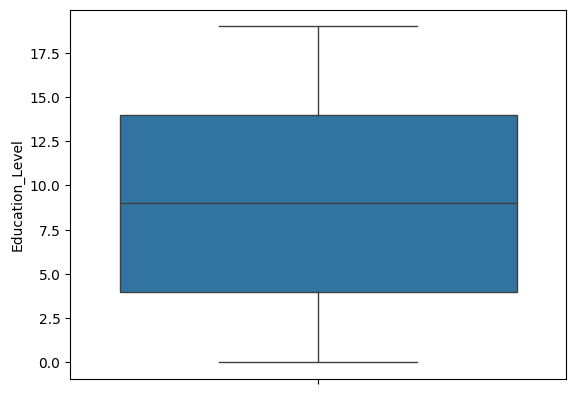

In [27]:
sns.boxplot(data.Education_Level)

In [28]:
data.Education_Level.nunique()/data.shape[0]*100  

0.02692406068683279

In [29]:
pd.crosstab(data.Education_Level,data.Alzheimer)

Alzheimer,No,Yes
Education_Level,,
0,2129,1517
1,2221,1561
2,2185,1524
3,2214,1501
4,2275,1466
5,2143,1542
6,2186,1594
7,2177,1570
8,2208,1510


In [30]:
data.drop(columns='Education_Level',axis=1,inplace=True)

In [31]:
data.BMI.min()

18.5

In [32]:
data.BMI.max()

35.0

<Axes: ylabel='BMI'>

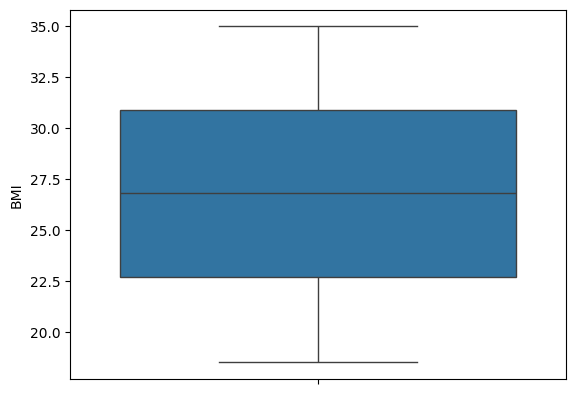

In [33]:
sns.boxplot(data.BMI)

In [34]:
data.groupby('Alzheimer')['BMI'].mean()

Alzheimer
No     26.787450
Yes    26.770976
Name: BMI, dtype: float64

In [35]:
data.BMI.nunique()/data.shape[0]*100 

0.22346970370071212

In [36]:
data.Cholesterol_Level.value_counts()

Cholesterol_Level
Normal    51973
High      22310
Name: count, dtype: int64

In [37]:
data.Cholesterol_Level.nunique()/data.shape[0]*100 

0.0026924060686832787

In [38]:
data.groupby('Cholesterol_Level')['BMI'].mean()

Cholesterol_Level
High      26.760731
Normal    26.789185
Name: BMI, dtype: float64

In [39]:
data.Physical_Activity_Level.nunique()/data.shape[0]*100                                 

0.004038609103024919

In [40]:
pd.crosstab(data.Alzheimer,data.Physical_Activity_Level)

Physical_Activity_Level,High,Low,Medium
Alzheimer,,,
No,14525,14536,14509
Yes,10328,10218,10167


<Axes: xlabel='Physical_Activity_Level'>

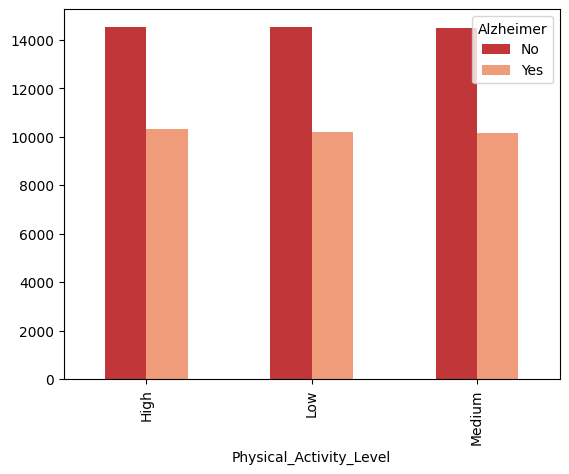

In [41]:
pd.crosstab(data.Physical_Activity_Level,data.Alzheimer).plot(kind='bar',color=color)

In [42]:
data.Smoking_Status.nunique()/data.shape[0]*100                                         

0.004038609103024919

In [43]:
data.Smoking_Status.value_counts()

Smoking_Status
Current    24915
Never      24740
Former     24628
Name: count, dtype: int64

<Axes: xlabel='Smoking_Status'>

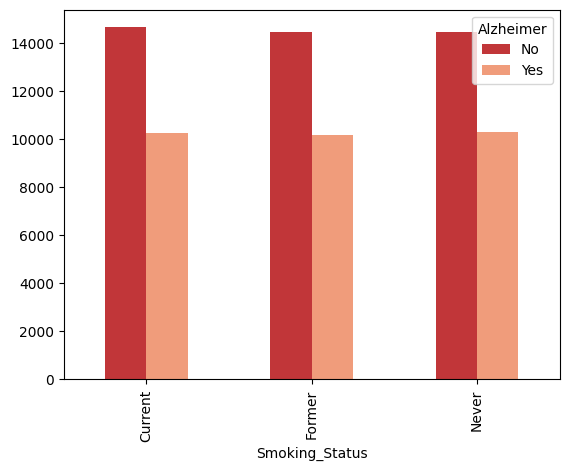

In [44]:
pd.crosstab(data.Smoking_Status,data.Alzheimer).plot(kind='bar',color=color)

In [45]:
data.Alcohol_Consumption.value_counts()

Alcohol_Consumption
Never           24865
Regularly       24738
Occasionally    24680
Name: count, dtype: int64

In [46]:
pd.crosstab(data.Alzheimer,data.Alcohol_Consumption)

Alcohol_Consumption,Never,Occasionally,Regularly
Alzheimer,,,
No,14659,14380,14531
Yes,10206,10300,10207


<Axes: xlabel='Alcohol_Consumption'>

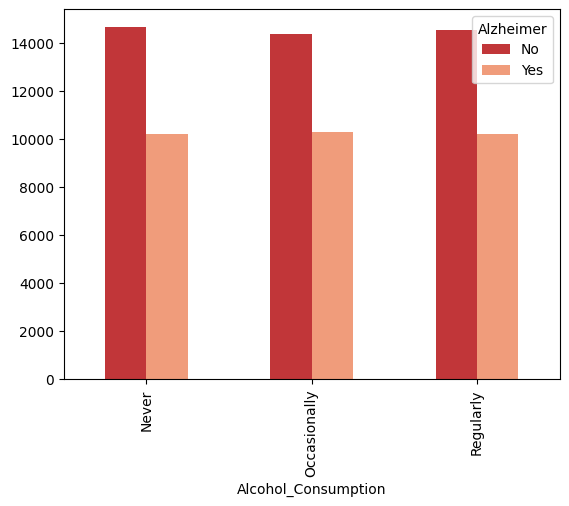

In [47]:
pd.crosstab(data.Alcohol_Consumption,data.Alzheimer).plot(kind='bar',color=color)

In [48]:
data.Family_History.value_counts()

Family_History
No     52004
Yes    22279
Name: count, dtype: int64

In [49]:
pd.crosstab(data.Alzheimer,data.Family_History)

Family_History,No,Yes
Alzheimer,,
No,32864,10706
Yes,19140,11573


<Axes: xlabel='Family_History'>

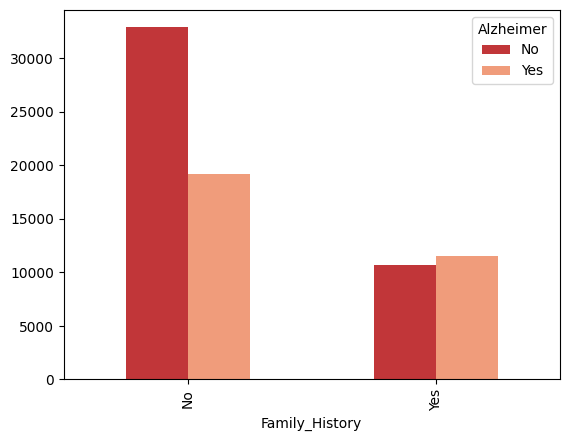

In [50]:
pd.crosstab(data.Family_History,data.Alzheimer).plot(kind='bar',color=color)

In [51]:
pd.crosstab(data.Alzheimer,data.Gender)

Gender,Female,Male
Alzheimer,,
No,21873,21697
Yes,15376,15337


<Axes: xlabel='Gender'>

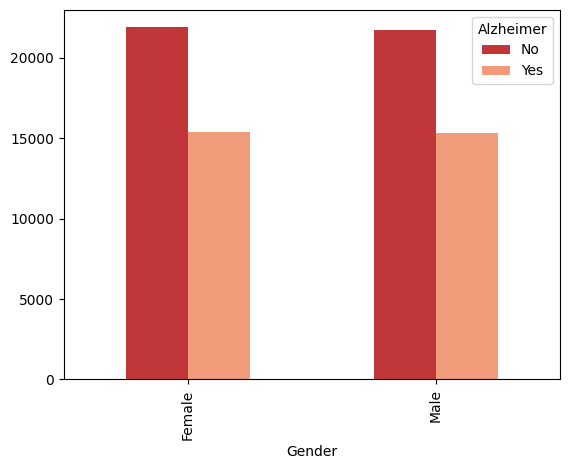

In [52]:
pd.crosstab(data.Gender,data.Alzheimer).plot(kind='bar',color=color)                                   

In [53]:
data.drop(columns='Gender',axis=1,inplace=True)

In [54]:
data.Income_Level.value_counts()

Income_Level
Low       24873
High      24848
Medium    24562
Name: count, dtype: int64

In [55]:
data.Income_Level.nunique()/data.shape[0]*100  

0.004038609103024919

<Axes: xlabel='Income_Level'>

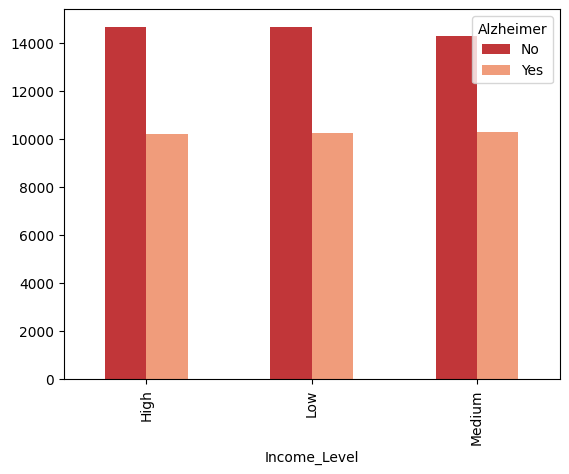

In [56]:
pd.crosstab(data.Income_Level,data.Alzheimer).plot(kind='bar',color=color) 

In [57]:
data.drop(columns='Income_Level',axis=1,inplace=True)

In [58]:
data.Urban_vs_Rural_Living.value_counts()

Urban_vs_Rural_Living
Rural    37203
Urban    37080
Name: count, dtype: int64

In [59]:
data.Urban_vs_Rural_Living.nunique()/data.shape[0]*100

0.0026924060686832787

<Axes: xlabel='Urban_vs_Rural_Living'>

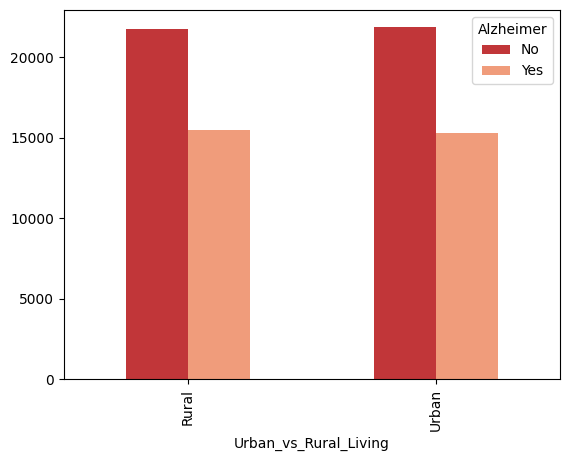

In [60]:
pd.crosstab(data.Urban_vs_Rural_Living,data.Alzheimer).plot(kind='bar',color=color) 

In [61]:
data.drop(columns='Urban_vs_Rural_Living',axis=1,inplace=True)

In [62]:
data.Stress_Levels.nunique()/data.shape[0]*100    

0.004038609103024919

In [63]:
data.Stress_Levels.value_counts()

Stress_Levels
Medium    24886
Low       24730
High      24667
Name: count, dtype: int64

In [64]:
pd.crosstab(data.Alzheimer,data.Stress_Levels)

Stress_Levels,High,Low,Medium
Alzheimer,,,
No,14378,14546,14646
Yes,10289,10184,10240


<Axes: xlabel='Stress_Levels'>

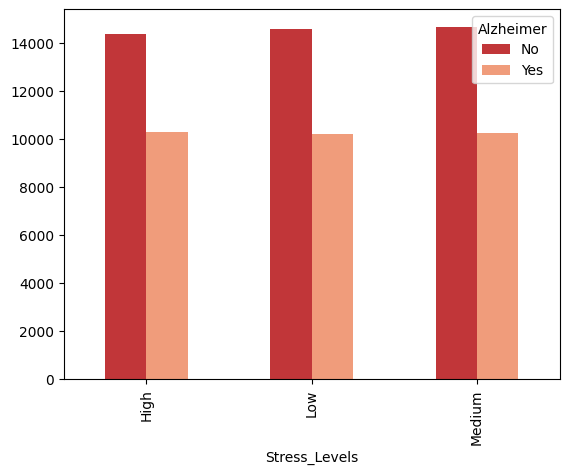

In [65]:
pd.crosstab(data.Stress_Levels,data.Alzheimer).plot(kind='bar',color=color) 

In [66]:
data.drop(columns='Stress_Levels',axis=1,inplace=True)

In [67]:
data.Social_Engagement_Level.nunique()/data.shape[0]*100                           

0.004038609103024919

In [68]:
data.Social_Engagement_Level.value_counts()

Social_Engagement_Level
Medium    24859
Low       24727
High      24697
Name: count, dtype: int64

In [69]:
pd.crosstab(data.Social_Engagement_Level,data.Alzheimer)

Alzheimer,No,Yes
Social_Engagement_Level,,
High,14540,10157
Low,14468,10259
Medium,14562,10297


<Axes: xlabel='Social_Engagement_Level'>

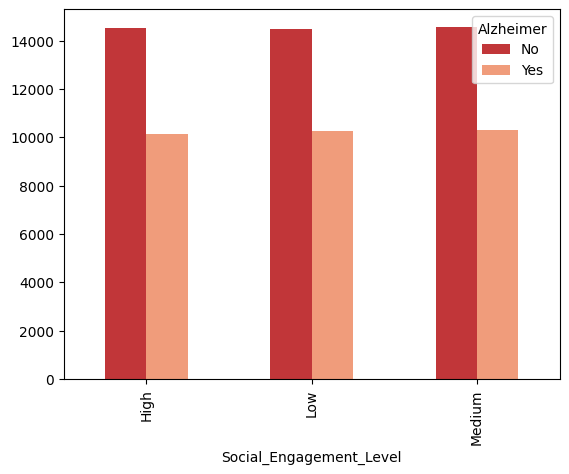

In [70]:
pd.crosstab(data.Social_Engagement_Level,data.Alzheimer).plot(kind='bar',color=color) 

In [71]:
data.drop(columns='Social_Engagement_Level',axis=1,inplace=True)

In [72]:
data.Genetic_Risk_Factor.nunique()/data.shape[0]*100                               

0.0026924060686832787

In [73]:
pd.crosstab(data.Genetic_Risk_Factor,data.Alzheimer)

Alzheimer,No,Yes
Genetic_Risk_Factor,,
No,37771,21790
Yes,5799,8923


<Axes: xlabel='Genetic_Risk_Factor'>

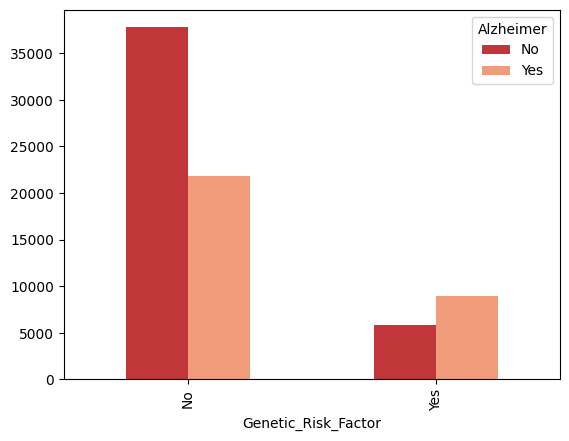

In [74]:
pd.crosstab(data.Genetic_Risk_Factor,data.Alzheimer).plot(kind='bar',color=color) 

In [75]:
data.Marital_Status.value_counts()

Marital_Status
Single     25169
Married    24573
Widowed    24541
Name: count, dtype: int64

In [76]:
pd.crosstab(data.Marital_Status,data.Alzheimer)

Alzheimer,No,Yes
Marital_Status,,
Married,14387,10186
Single,14782,10387
Widowed,14401,10140


<Axes: xlabel='Marital_Status'>

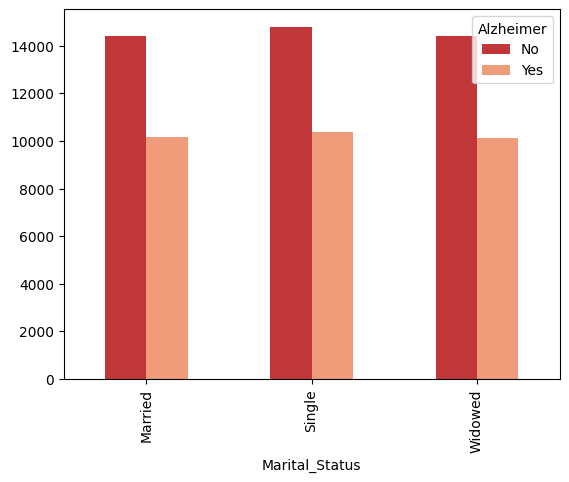

In [77]:
pd.crosstab(data.Marital_Status,data.Alzheimer).plot(kind='bar',color=color)

In [78]:
data.drop(columns='Marital_Status',axis=1,inplace=True)

In [79]:
data.Employment_Status.value_counts()

Employment_Status
Unemployed    24801
Employed      24755
Retired       24727
Name: count, dtype: int64

In [80]:
pd.crosstab(data.Employment_Status,data.Alzheimer)

Alzheimer,No,Yes
Employment_Status,,
Employed,14613,10142
Retired,14422,10305
Unemployed,14535,10266


<Axes: xlabel='Employment_Status'>

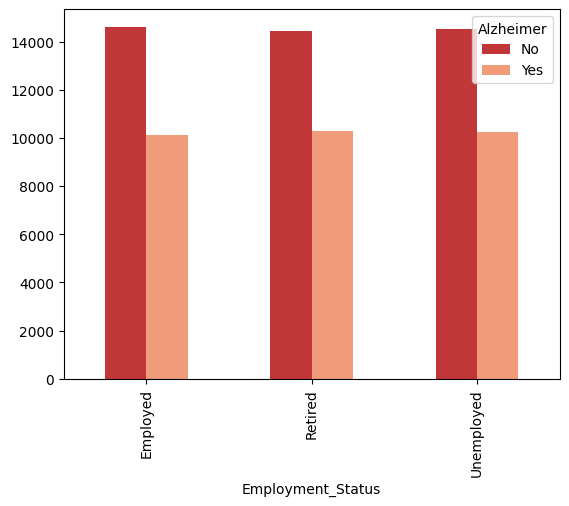

In [81]:
pd.crosstab(data.Employment_Status,data.Alzheimer).plot(kind='bar',color=color)

In [82]:
data.drop(columns='Employment_Status',axis=1,inplace=True)

In [83]:
pd.crosstab(data.Air_Pollution_Exposure,data.Alzheimer)                        

Alzheimer,No,Yes
Air_Pollution_Exposure,,
High,14649,10257
Low,14383,10273
Medium,14538,10183


<Axes: xlabel='Air_Pollution_Exposure'>

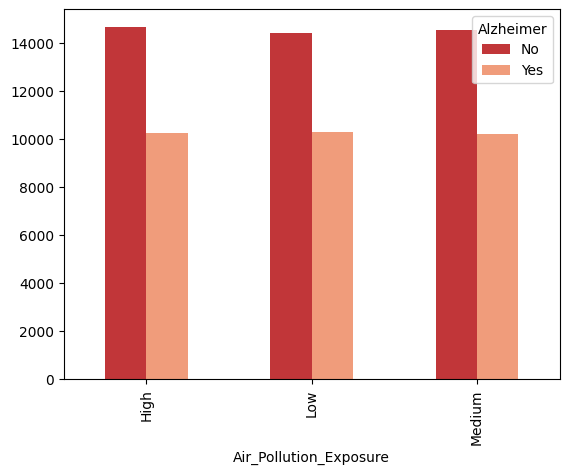

In [84]:
pd.crosstab(data.Air_Pollution_Exposure,data.Alzheimer).plot(kind='bar',color=color)

In [85]:
data.drop(columns='Air_Pollution_Exposure',axis=1,inplace=True)

In [86]:
pd.crosstab(data.Dietary_Habits,data.Alzheimer)                                                

Alzheimer,No,Yes
Dietary_Habits,,
Average,14636,10281
Healthy,14535,10153
Unhealthy,14399,10279


<Axes: xlabel='Dietary_Habits'>

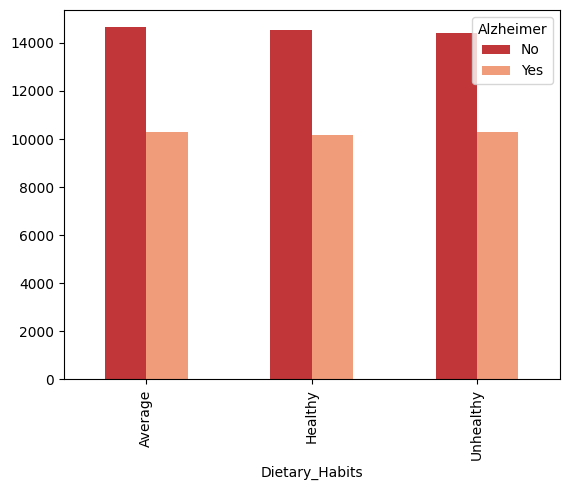

In [87]:
pd.crosstab(data.Dietary_Habits,data.Alzheimer).plot(kind='bar',color=color)

In [88]:
data.drop(columns='Dietary_Habits',axis=1,inplace=True)

In [89]:
data.Sleep_Quality.nunique()/data.shape[0]*100

0.004038609103024919

In [90]:
pd.crosstab(data.Sleep_Quality,data.Alzheimer)                           

Alzheimer,No,Yes
Sleep_Quality,,
Average,14497,10218
Good,14765,10380
Poor,14308,10115


<Axes: xlabel='Sleep_Quality'>

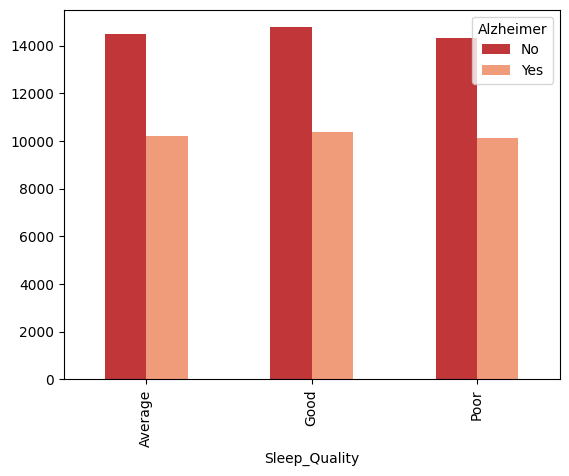

In [91]:
pd.crosstab(data.Sleep_Quality,data.Alzheimer).plot(kind='bar',color=color)

In [92]:
data.drop(columns='Sleep_Quality',axis=1,inplace=True)

In [93]:
pd.crosstab(data.Depression_Level,data.Alzheimer)                         

Alzheimer,No,Yes
Depression_Level,,
High,14446,10236
Low,14505,10253
Medium,14619,10224


<Axes: xlabel='Depression_Level'>

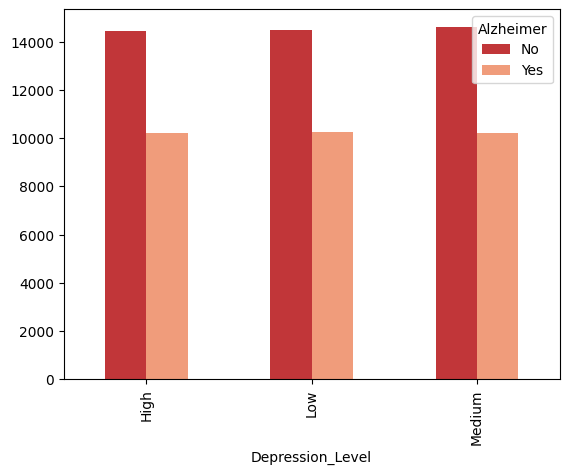

In [94]:
pd.crosstab(data.Depression_Level,data.Alzheimer).plot(kind='bar',color=color)

<Axes: ylabel='Cognitive_Test'>

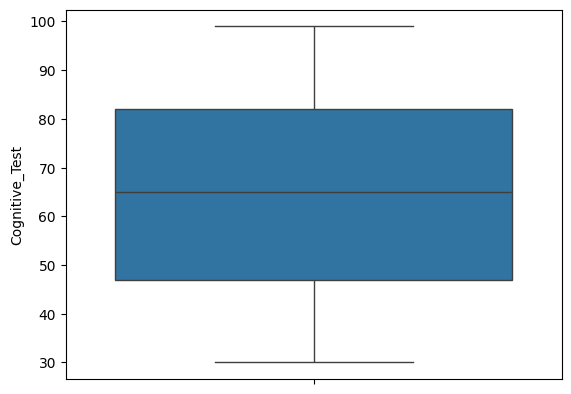

In [95]:
sns.boxplot(data.Cognitive_Test)

In [96]:
data.groupby('Alzheimer')['Cognitive_Test'].mean()

Alzheimer
No     64.673560
Yes    64.626836
Name: Cognitive_Test, dtype: float64

<Axes: xlabel='Alzheimer'>

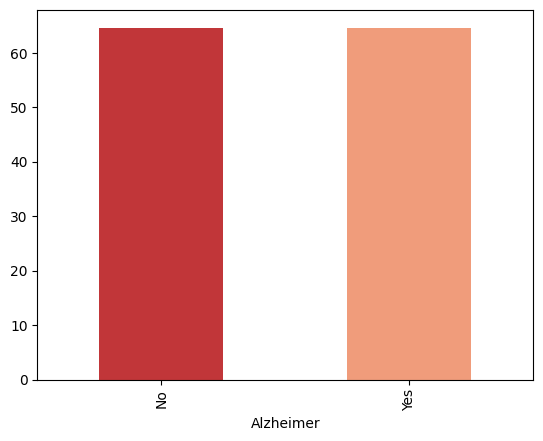

In [97]:
data.groupby('Alzheimer')['Cognitive_Test'].mean().plot(kind='bar',color=color)

In [98]:
pd.crosstab(data.Diabetes,data.Alzheimer)                          

Alzheimer,No,Yes
Diabetes,,
No,34876,24651
Yes,8694,6062


<Axes: xlabel='Diabetes'>

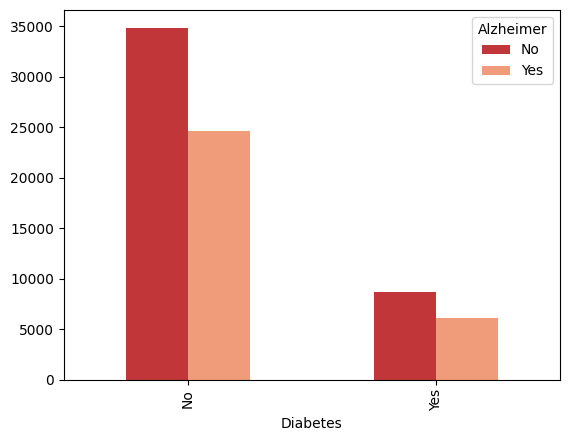

In [99]:
pd.crosstab(data.Diabetes,data.Alzheimer).plot(kind='bar',color=color)

In [100]:
pd.crosstab(data.Hypertension,data.Alzheimer)                       

Alzheimer,No,Yes
Hypertension,,
No,30559,21575
Yes,13011,9138


<Axes: xlabel='Diabetes'>

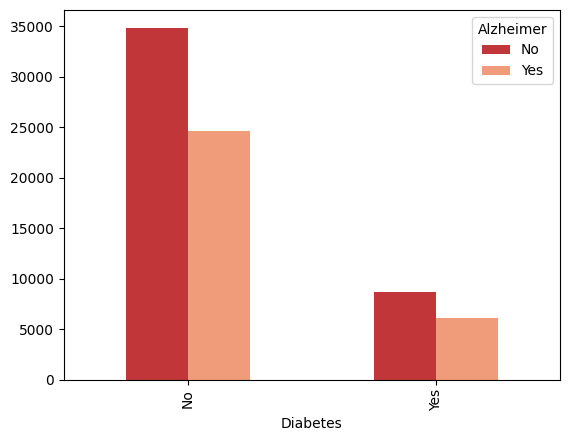

In [101]:
pd.crosstab(data.Diabetes,data.Alzheimer).plot(kind='bar',color=color)

In [102]:
data.columns

Index(['Age', 'BMI', 'Physical_Activity_Level', 'Smoking_Status',
       'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Cholesterol_Level',
       'Family_History', 'Cognitive_Test', 'Depression_Level',
       'Genetic_Risk_Factor', 'Alzheimer'],
      dtype='object')

In [103]:
data.drop(columns='BMI',axis=1,inplace=True)

In [104]:
data.drop(columns='Physical_Activity_Level',axis=1,inplace=True)

In [105]:
lb=LabelEncoder()

In [106]:
categorical_cols = data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [107]:
categorical_cols

Index(['Smoking_Status', 'Alcohol_Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Family_History', 'Depression_Level',
       'Genetic_Risk_Factor', 'Alzheimer'],
      dtype='object')

In [108]:
x=data.drop(columns='Alzheimer',axis=1)
y=data.Alzheimer

In [109]:
x

,Age,Smoking_Status,Alcohol_Consumption,Diabetes,Hypertension,Cholesterol_Level,Family_History,Cognitive_Test,Depression_Level,Genetic_Risk_Factor
0,90,2,1,0,0,1,0,90,1,0
1,72,1,0,0,0,1,0,65,1,0
2,86,0,1,0,1,1,0,43,0,0
3,53,2,2,1,0,1,0,81,2,0
4,58,1,0,1,0,1,0,49,0,0
...,...,...,...,...,...,...,...,...,...,...
74278,60,1,0,0,0,0,0,42,2,0
74279,58,2,1,1,0,1,0,42,1,0
74280,57,2,2,0,0,0,1,61,1,1
74281,73,2,2,0,0,0,0,97,0,0


In [110]:
y

0        0
1        0
2        0
3        0
4        0
        ..
74278    0
74279    0
74280    0
74281    0
74282    0
Name: Alzheimer, Length: 74283, dtype: int32

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train)

In [111]:
xx

NameError: name 'xx' is not defined

In [ ]:
model_params={
   
    'Logistic_Regression':{
        'model':LogisticRegression(),
        'params':{
                'penalty':['l1', 'l2'],
                'C':[0.01, 0.1, 1, 10],
                'solver':['saga'],
                'max_iter':[100, 200, 500],
                'multi_class':['multinomial']
            }
        },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,100,200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]

        }
    }

    
}

In [ ]:
score=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    clf.fit(x,y)
    score.append({
        'model': model_name,
        'train_score': clf.cv_results_['mean_train_score'][clf.best_index_],
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(score,columns=['model','train_score','best_score','best_params'])
df

,model,train_score,best_score,best_params
0,Logistic_Regression,0.710640,0.710620,"{'C': 0.01, 'max_iter': 200, 'multi_class': 'm..."
1,random_forest,0.741468,0.725361,"{'max_depth': 10, 'min_samples_split': 10, 'n_..."
